In [1]:
# Import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
# Load Data
train = pd.read_csv("preprocessed_train_data.csv", index_col = 0)
test = pd.read_csv("preprocessed_test_data.csv", index_col = 0)

trained_tweets = train['keyword']+train['text']
test_tweets = test['keyword']+test['text']

In [5]:
state = 12  
test_size = 0.30
  
X_train, X_test, Y_train, Y_test = train_test_split(trained_tweets, train['target'],  
    test_size=test_size, random_state=state)

In [9]:
word_vectorizer = TfidfVectorizer(
    analyzer='word',
    stop_words='english',
    ngram_range=(1, 3),
    lowercase=True,
    min_df=5,
    max_features=30000)

char_vectorizer = TfidfVectorizer(
    analyzer='char',
    stop_words='english',
    ngram_range=(3, 6),
    lowercase=True,
    min_df=5,
    max_features=50000)

vectorizer = FeatureUnion([('word_vectorizer', word_vectorizer),  ('char_vectorizer', char_vectorizer)])
vectorizer.fit(X_train)

X_train_vectors = vectorizer.transform(X_train).toarray()
X_test_vectors = vectorizer.transform(X_test).toarray()
print(X_train_vectors.shape, X_test_vectors.shape)

(5329, 44132) (2284, 44132)


In [11]:
# Basic Model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_vectors, y_train)

/home/stellasylee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
predictions = logisticRegr.predict(X_test_vectors)

In [13]:
print("Accuracy score (training): {0:.3f}".format(logisticRegr.score(X_train_vectors, y_train)))
print("Accuracy score (validation): {0:.3f}".format(logisticRegr.score(X_test_vectors, y_test)))

Accuracy score (training): 0.897
Accuracy score (validation): 0.795


Confusion matrix, without normalization
[[1151  185]
 [ 283  665]]


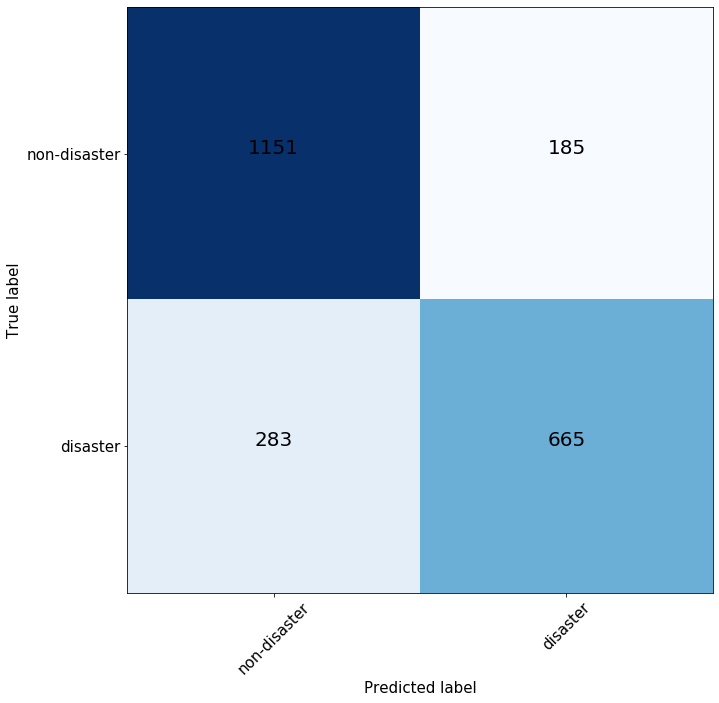

In [16]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

class_names = ['non-disaster','disaster']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize = 15)
    plt.yticks(tick_marks, classes,fontsize = 15)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize = 20)

    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label', fontsize = 15)
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

No Skill: ROC AUC=0.500
gb: ROC AUC=0.782


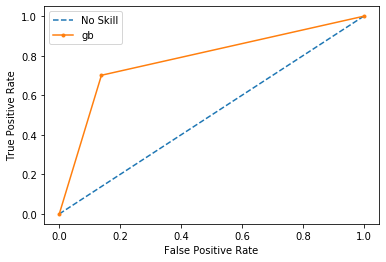

In [17]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, predictions)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('gb: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='gb')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()